In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [37]:
data=pd.read_csv("Teutan.csv")

In [38]:
data.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [40]:
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [41]:
data["DateTime"]=pd.to_datetime(data["DateTime"],format="%m/%d/%Y %H:%M")

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [43]:
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [44]:
 data["DateTime"]=data["DateTime"].values.astype(float)

In [45]:
# Conver to DateTime to Unix timestamp for the fit model
data["DateTime"] = data["DateTime"].apply(lambda x: x.timestamp())

AttributeError: 'float' object has no attribute 'timestamp'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  float64
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
#data = pd.read_csv('data_set.csv')

# Setting DateTime column as index
#data['DateTime'] = pd.to_datetime(data['DateTime'])
#data.set_index('DateTime', inplace=True)

# Remove unnecessary columns
data = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows']]
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Separating training and testing sets
train_size = int(len(data_scaled) * 0.7)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Split the dataset into time steps for LSTM
def create_sequences(dataset, seq_length):
    X = []
    y = []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i+seq_length])
        y.append(dataset[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Creating LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, data.shape[1])))
model.add(Dense(data.shape[1]))  # Output layer size must be equal to the number of features

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Predict future values
future_data = data_scaled[-seq_length:]  # Let's take the last seq_length data as an example
future_data = future_data.reshape((1, seq_length, data.shape[1]))
predicted_data = model.predict(future_data)

# Convert predicted value to actual measurements
predicted_data = scaler.inverse_transform(predicted_data)
print(f'Tahmin edilen değer: {predicted_data}')


Epoch 1/10
1147/1147 [==============================] - 12s 7ms/step - loss: 0.0046
Epoch 2/10
1147/1147 [==============================] - 8s 7ms/step - loss: 0.0010
Epoch 3/10
1147/1147 [==============================] - 8s 7ms/step - loss: 8.4669e-04
Epoch 4/10
1147/1147 [==============================] - 9s 8ms/step - loss: 7.5747e-04
Epoch 5/10
1147/1147 [==============================] - 8s 7ms/step - loss: 7.1257e-04
Epoch 6/10
1147/1147 [==============================] - 9s 8ms/step - loss: 6.8747e-04
Epoch 7/10
1147/1147 [==============================] - 9s 8ms/step - loss: 6.7154e-04
Epoch 8/10
1147/1147 [==============================] - 8s 7ms/step - loss: 6.6622e-04
Epoch 9/10
1147/1147 [==============================] - 9s 8ms/step - loss: 6.6387e-04
Epoch 10/10
1147/1147 [==============================] - 9s 8ms/step - loss: 6.5131e-04
Train Loss: 0.0006394104566425085, Test Loss: 0.0006446976331062615
1/1 [==============================] - 0s 461ms/step
Tahmin edilen d

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('Teutan.csv')

# Setting DateTime column as index
#data['DateTime'] = pd.to_datetime(data['DateTime'])
data["DateTime"]=pd.to_datetime(data["DateTime"],format="%m/%d/%Y %H:%M")
data.set_index('DateTime', inplace=True)

# Remove unnecessary columns
data = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',"diffuse flows"]]
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the dataset into time steps for LSTM
def create_sequences(dataset, seq_length):
    X = []
    y = []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i+seq_length])
        y.append(dataset[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps
X, y = create_sequences(data_scaled, seq_length)

# Creating LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, data.shape[1])))
model.add(Dense(data.shape[1]))  # Output layer size must be equal to the number of features

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X, y, epochs=12, batch_size=32)

# Data to be used for prediction
last_data = data_scaled[-seq_length:]
future_data = np.array([last_data])

# Predict future values
predicted_data = []
num_predictions = 288  # 7 days of data for a week's forecast
for _ in range(num_predictions):
    prediction = model.predict(future_data)
    predicted_data.append(prediction)
    future_data = np.append(future_data[:, 1:, :], prediction.reshape(1, 1, data.shape[1]), axis=1)

# Convert predicted values to actual measurements
predicted_data = np.array(predicted_data).reshape((num_predictions, data.shape[1]))
predicted_data = scaler.inverse_transform(predicted_data)

# Show predicted values as DataFrame
prediction_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=10), periods=num_predictions, freq='10min')
prediction_df = pd.DataFrame(predicted_data, columns=data.columns, index=prediction_dates)
#prediction_df.index.name = 'DateTime' 
prediction_df.insert(0, 'DateTime', prediction_dates)
prediction_df.reset_index(drop=True, inplace=True) 
print(prediction_df)
# Arrange predicted values like x and y datasets
predicted_values_X, predicted_values_y = create_sequences(predicted_values, seq_length)

# Ensuring predicted values match the model's expected input pattern
predicted_values_X = np.reshape(predicted_values_X, (predicted_values_X.shape[0], seq_length, data.shape[1]))

# Calculating the score value of the model
score = model.evaluate(predicted_values_X, predicted_values_y)
print("Model Score:", score)




Epoch 1/12
1638/1638 [==============================] - 20s 10ms/step - loss: 0.0032
Epoch 2/12
1638/1638 [==============================] - 14s 9ms/step - loss: 9.2430e-04
Epoch 3/12
1638/1638 [==============================] - 14s 9ms/step - loss: 7.9875e-04
Epoch 4/12
1638/1638 [==============================] - 15s 9ms/step - loss: 7.5767e-04
Epoch 5/12
1638/1638 [==============================] - 15s 9ms/step - loss: 7.3832e-04
Epoch 6/12
1638/1638 [==============================] - 15s 9ms/step - loss: 7.2046e-04
Epoch 7/12
1638/1638 [==============================] - 14s 9ms/step - loss: 7.1137e-04
Epoch 8/12
1638/1638 [==============================] - 14s 9ms/step - loss: 7.0329e-04
Epoch 9/12
1638/1638 [==============================] - 15s 9ms/step - loss: 6.9808e-04
Epoch 10/12
1638/1638 [==============================] - 15s 9ms/step - loss: 6.9832e-04
Epoch 11/12
1638/1638 [==============================] - 15s 9ms/step - loss: 6.9170e-04
Epoch 12/12
1/1 [================

R^2 score: 0.9149903514007817
Mean Squared Error (MSE): 4245583.56380677
Mean Absolute Error (MAE): 1273.8377312020978


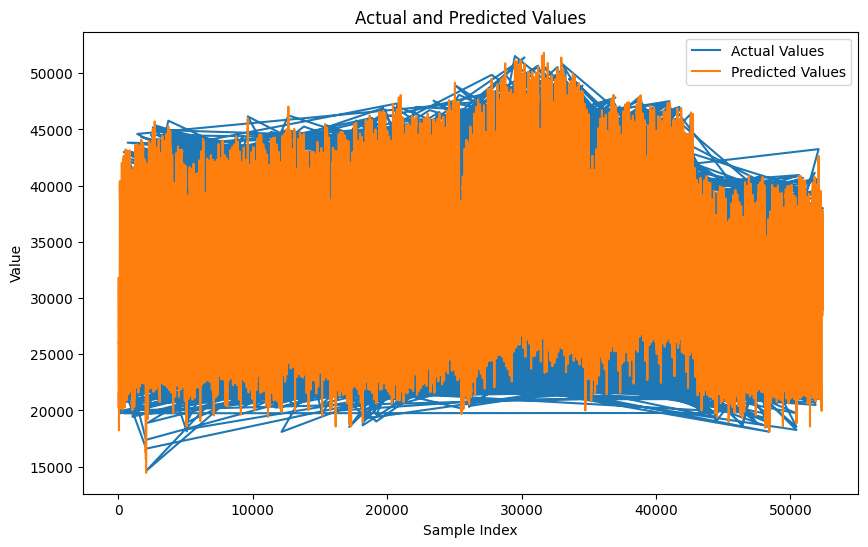

In [ ]:
import joblib

# Separate features and targets
# Load the dataset
data = pd.read_csv('Teutan.csv')
data["DateTime"]=pd.to_datetime(data["DateTime"],format="%m/%d/%Y %H:%M")
data["DateTime"]=data["DateTime"].values.astype(float)
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#X_train["DateTime"]=pd.to_datetime(X_train["DateTime"],format="%Y-%m-%d %H:%M:%S")


# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)
rf_model.predict(X_test)

# Save the model
joblib.dump(rf_model, "rf_model.joblib")

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)


print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

#Random forest algoritması

import matplotlib.pyplot as plt

# Extract the features from the new data
X_new = data[["DateTime","Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]

# Make predictions on the new data
y_pred = rf_model.predict(X_new)

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               288 non-null    float64
 1   Temperature            288 non-null    float32
 2   Humidity               288 non-null    float32
 3   Wind Speed             288 non-null    float32
 4   general diffuse flows  288 non-null    float32
 5   diffuse flows          288 non-null    float32
dtypes: float32(5), float64(1)
memory usage: 8.0 KB


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load the trained model
rf_model = joblib.load('rf_model.joblib')

a = prediction_df
a["DateTime"]=a["DateTime"].values.astype(float)

# Adapt model expected column names to predicted dataset
#prediction_df = prediction_df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
column_names = ['DateTime', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption']
new_data = pd.DataFrame(columns=column_names)
# Zone 1 Power Consumption değerlerini tahmin etme
zone1_pred = rf_model.predict(a)

# Add predicted values to new_data DataFrame
new_data['DateTime'] = a['DateTime']
new_data['Temperature'] = a['Temperature']
new_data['Humidity'] = a['Humidity']
new_data['Wind Speed'] = a['Wind Speed']
new_data['general diffuse flows'] = a['general diffuse flows']
new_data['diffuse flows'] = a['diffuse flows']
new_data['Zone 1 Power Consumption'] = zone1_pred

# Print predicted values
print(new_data)

# Saving estimated values to Excel file
new_data.to_excel('tahminlerSon.xlsx', index=False)

# Show predicted values on the chart
plt.figure(figsize=(10, 6))
plt.plot(new_data['DateTime'], new_data['Zone 1 Power Consumption'], label='Estimated Values')
plt.xlabel('DateTime')
plt.ylabel('Zone 1 Power Consumption')
plt.title('Zone 1 Tahminleri')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.joblib'

In [ ]:
#X = X.astype({'DateTime': 'datetime64[ns]'})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  52416 non-null  float64
dtypes: float64(1)
memory usage: 409.6 KB


In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Distinguish between independent variables and target variable
X = data[['DateTime']]
#X["DateTime"] = X["DateTime"].apply(lambda x: x.timestamp())
X = X.astype({'DateTime': 'datetime64[ns]'})
#X["DateTime"]=pd.to_datetime(X["DateTime"],format="%m/%d/%Y %H:%M")
#X["DateTime"] = pd.to_datetime(X["DateTime"])
y_temp = data['Temperature']
y_humidity = data['Humidity']
y_wind = data['Wind Speed']
y_general = data['general diffuse flows']
y_diffuse = data['diffuse flows']

# Create training and testing datasets
X_train, X_test, y_temp_train, y_temp_test = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train, X_test, y_humidity_train, y_humidity_test = train_test_split(X, y_humidity, test_size=0.2, random_state=42)
X_train, X_test, y_wind_train, y_wind_test = train_test_split(X, y_wind, test_size=0.2, random_state=42)
X_train, X_test, y_general_train, y_general_test = train_test_split(X, y_general, test_size=0.2, random_state=42)
X_train, X_test, y_diffuse_train, y_diffuse_test = train_test_split(X, y_diffuse, test_size=0.2, random_state=42)

# Build and train Random Forest Regression model
model_temp = RandomForestRegressor()
model_temp.fit(X_train, y_temp_train)

model_humidity = RandomForestRegressor()
model_humidity.fit(X_train, y_humidity_train)

model_wind = RandomForestRegressor()
model_wind.fit(X_train, y_wind_train)

model_general = RandomForestRegressor()
model_general.fit(X_train, y_general_train)

model_diffuse = RandomForestRegressor()
model_diffuse.fit(X_train, y_diffuse_train)

# Save models
joblib.dump(model_temp, 'temp_model.joblib')
joblib.dump(model_humidity, 'humidity_model.joblib')
joblib.dump(model_wind, 'wind_model.joblib')
joblib.dump(model_general, 'general_model.joblib')
joblib.dump(model_diffuse, 'diffuse_model.joblib')

# Make a guess
y_temp_pred = model_temp.predict(X_test)
y_humidity_pred = model_humidity.predict(X_test)
y_wind_pred = model_wind.predict(X_test)
y_general_pred = model_general.predict(X_test)
y_diffuse_pred = model_diffuse.predict(X_test)

# Evaluate prediction performance
mse_temp = mean_squared_error(y_temp_test, y_temp_pred)
mse_humidity = mean_squared_error(y_humidity_test, y_humidity_pred)
mse_wind = mean_squared_error(y_wind_test, y_wind_pred)
mse_general = mean_squared_error(y_general_test, y_general_pred)
mse_diffuse = mean_squared_error(y_diffuse_test, y_diffuse_pred)
"""
print("Temperature Estimation Error (MSE):", mse_temp)
print("Humidity Estimation Error (MSE):", mse_humidity)
print("Wind Speed Estimation Error (MSE):", mse_wind)
print("General Diffused Flows Estimation Error (MSE):", mse_general)
print("Diffused Flows Estimation Error (MSE):", mse_diffuse)
"""

"""print("\nEstimated Temperature Values:")
print(y_temp_pred)
print("\nEstimated Humidity Values:")
print(y_humidity_pred)
print("\nEstimated Wind Speed Values:")
print(y_wind_pred)
print("\nEstimated General Diffused Flows Values:")
print(y_general_pred)
print("\nPredicted Diffused Flows Values:")
print(y_diffuse_pred)"""

predictions = pd.DataFrame({
     "DateTime": X_test["DateTime"],
     "Predicted Temperature": y_temp_pred,
     "Predicted Humidity": y_humidity_pred,
     "Predicted Wind Speed": y_wind_pred,
     "Predicted General Diffused Flows": y_general_pred,
     "Predicted Diffuse Flows": y_diffuse_pred,
})

# Print DataFrame to Excel file
predictions.to_excel("tahminler4.xlsx", index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
new_data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,1.514592e+09,6.64932,73.61,0.0814,0.06422,0.10292,31263.026615
1,1.514593e+09,6.64932,73.61,0.0814,0.06422,0.10292,31263.026615
2,1.514593e+09,6.64932,73.61,0.0814,0.06422,0.10292,31263.026615
3,1.514594e+09,6.64932,73.61,0.0814,0.06422,0.10292,31263.026615
4,1.514594e+09,6.64932,73.61,0.0814,0.06422,0.10292,31263.026615
...,...,...,...,...,...,...,...
1004,1.515194e+09,6.64932,73.61,0.0814,0.06422,0.10292,28959.878327
1005,1.515195e+09,6.64932,73.61,0.0814,0.06422,0.10292,28959.878327
1006,1.515196e+09,6.64932,73.61,0.0814,0.06422,0.10292,28959.878327
1007,1.515196e+09,6.64932,73.61,0.0814,0.06422,0.10292,28959.878327


In [ ]:
import joblib
import pandas as pd

# Load the trained model
rf_model = joblib.load("rf_model.joblib")

# Prepare the new data for prediction (next week's data)
new_data = pd.DataFrame({
    "DateTime": pd.date_range(start='2023-06-11', periods=7, freq='D'),
    "Temperature": [25.5, 26.1, 24.8, 25.3, 24.7, 23.9, 24.5],
    "Humidity": [60, 55, 62, 57, 63, 58, 59],
    "Wind Speed": [10, 12, 8, 11, 9, 10, 11],
    "general diffuse flows": [80, 85, 90, 88, 86, 82, 84],
    "diffuse flows": [100, 110, 95, 105, 98, 102, 99]
})

X_new=new_data

X_new["DateTime"] = pd.to_datetime(X_new["DateTime"]).astype(int) / 10**9
y_pred = rf_model.predict(X_new)

# Add the predicted values to the new_data DataFrame
new_data["Zone 1 Power Consumption"] = y_pred

# Print the predicted values for Zone 1 Power Consumption
print("Tahmin Edilen Zone 1 Power Consumption Değerleri:")
print(new_data["Zone 1 Power Consumption"])

new_data.to_excel("tahminler.xlsx", index=False)


Tahmin Edilen Zone 1 Power Consumption Değerleri:
0    39731.133679
1    40646.328337
2    37903.313910
3    39693.496431
4    37670.230226
5    38650.071646
6    37924.753641
Name: Zone 1 Power Consumption, dtype: float64


R^2 score: 0.2005745587072546
Mean Squared Error (MSE): 40366497.135165244
Mean Absolute Error (MAE): 5219.042516607173


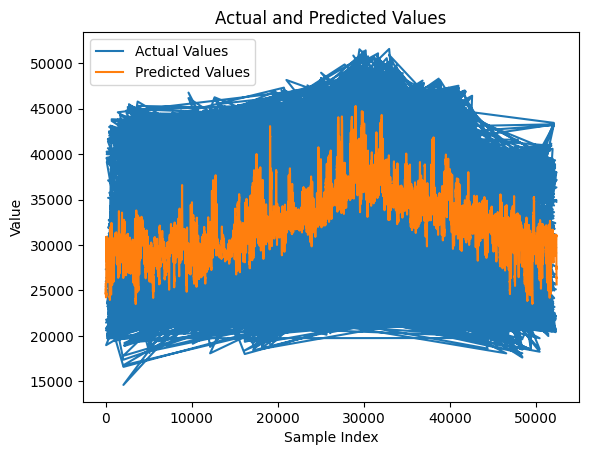

In [ ]:
# Linear 
# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)



print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

#Linear Regression algorithm
# Extract the features from the new data
X_new = data[["DateTime","Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]

# Make predictions on the new data
y_pred = lr_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual and Predicted Values')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

R^2 score: -0.00035037615825528334
Mean Squared Error (MSE): 50512078.43479991
Mean Absolute Error (MAE): 5910.36795152093


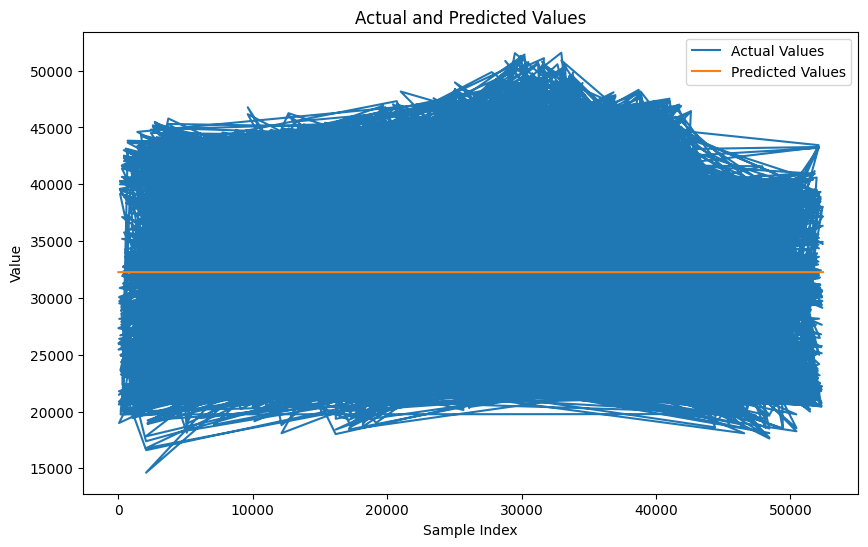

In [ ]:
# Support Vector
# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR

# Initialize the support vector regression model
svr_model = SVR()

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["DateTime","Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]

# Make predictions on the new data
y_pred = svr_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual and Predicted Values')
plt.legend()
plt.show()

# Support Vector algorithm

R^2 score: 0.7463047506011544
Mean Squared Error (MSE): 12810185.952430066
Mean Absolute Error (MAE): 1663.270411930561


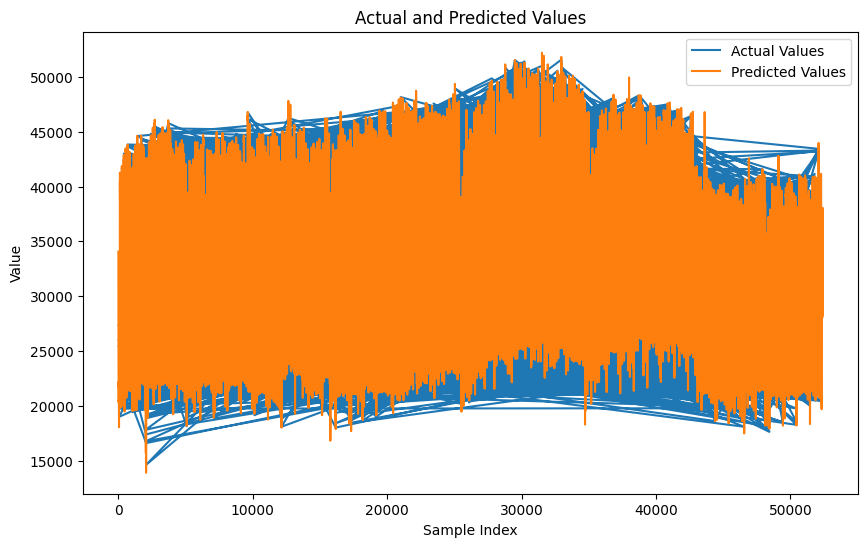

In [ ]:
# Decision Trees

# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor
dt_model = DecisionTreeRegressor()

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["DateTime","Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]

# Make predictions on the new data
y_pred = dt_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual and Predicted Values')
plt.legend()
plt.show()



In [ ]:
# Gradiant 

# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import GradientBoostingRegressor

# Initialize the gradient boosting regressor
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


R^2 score: 0.41778517456559683
Mean Squared Error (MSE): 29398580.366598904
Mean Absolute Error (MAE): 4230.3869907739445


R^2 score: 0.9930402003836795
Mean Squared Error (MSE): 351430.8111325781
Mean Absolute Error (MAE): 377.0643949710034


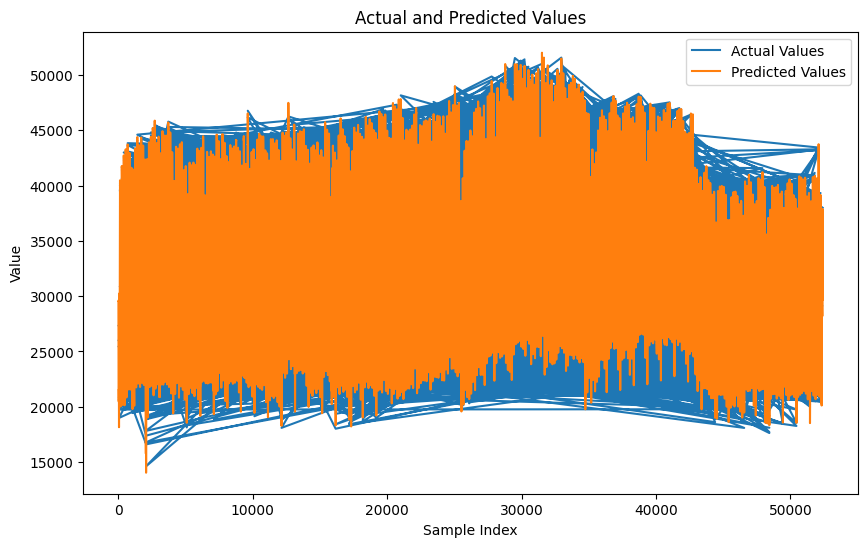

In [ ]:
# K-Nearest
import joblib
# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Nearest Neighbors regressor
knn_model = KNeighborsRegressor()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

joblib.dump(knn_model, "knn_model.joblib")

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["DateTime","Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]

# Make predictions on the new data
y_pred = knn_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual and Predicted Values')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import joblib
from datetime import datetime, timedelta

# Load the trained model
knn_model = joblib.load("knn_model.joblib") # Update the filename of the trained model

# Determine the target date and the number of days we want to make a prediction
hedef_tarih = np.datetime64("2023-06-06")
gun_sayisi = 7

# Create new data frame to make predictions
new_data = pd.DataFrame(columns=["DateTime", "Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"])

# Filling in data to make predictions
for i in range(gun_sayisi):
    new_row = pd.DataFrame({
        "DateTime": [hedef_tarih + np.timedelta64(i, 'D')],
        "Temperature": [20], # Specify any other features you want to predict here
        "Humidity": [17],
        "Wind Speed": [10],
        "general diffuse flows": [20],
        "diffuse flows": [15]
    })
    new_data = pd.concat([new_data, new_row], ignore_index=True)

# Don't guess
predictions = knn_model.predict(new_data.drop(columns=["DateTime"]))

# Print prediction results
for i in range(gun_sayisi):
    tarih = hedef_tarih + np.timedelta64(i, 'D')
    tahmin = predictions[i]
    print(f"Tarih: {tarih}, Tahmin: {tahmin}")


ValueError: ignored

In [49]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import joblib
from datetime import datetime

# Load the trained model
knn_model = joblib.load("knn_model.joblib")  # Update the filename of the trained model

# Get data from user
hedef_tarih = input("Hedef Tarih (YYYY-AA-GG formatında): ")
temperature = float(input("Temperature değeri: "))
humidity = float(input("Humidity değeri: "))
wind_speed = float(input("Wind Speed değeri: "))
general_diffuse_flows = float(input("General Diffuse Flows değeri: "))
diffuse_flows = float(input("Diffuse Flows değeri: "))

# Convert target date to appropriate data type
hedef_tarih = np.datetime64(hedef_tarih)

# Creating new data to make predictions
new_data = pd.DataFrame({
    "DateTime": [hedef_tarih],
    "Temperature": [temperature],
    "Humidity": [humidity],
    "Wind Speed": [wind_speed],
    "general diffuse flows": [general_diffuse_flows],
    "diffuse flows": [diffuse_flows]
})
# Don't guess
prediction = knn_model.predict(new_data)

print("Target date:", hedef_tarih.astype(str))
print("Estimated Zone 1 Power Consumption:", prediction)


In [ ]:
# Artificial neural networks

# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPRegressor

# Initialize the Multi-Layer Perceptron regressor
mlp_model = MLPRegressor()

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = mlp_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean squared error:  50683182.85747222


In [ ]:
# Linear Support Vectors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import LinearSVR

# Initialize the Linear Support Vector Regressor
svm_model = LinearSVR()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R^2 score: -20.785396689939862
Mean Squared Error (MSE): 1100040238.4627938
Mean Absolute Error (MAE): 32396.69507923788


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.linear_model import ElasticNet # ElastikNet

# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ElasticNet regressor
en_model = ElasticNet()

# Train the model on the training data
en_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = en_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



Mean squared error:  39005791.60353998


In [ ]:
import xgboost as xgb # XGBoost


# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model on the training data
xgb_model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



R^2 score: 0.5158635322155503
Mean Squared Error (MSE): 24446173.8773879
Mean Absolute Error (MAE): 3761.2449668871614


In [ ]:
import lightgbm as lgb # LightGBM


# Separate features and target
X = data.drop(columns=["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"])
y = data["Zone 1 Power Consumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to Dataset format
train_data = lgb.Dataset(X_train, label=y_train)

# Set the parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse'
}

# Train the model on the training data
lgb_model = lgb.train(params, train_data)

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 41932, number of used features: 6
[LightGBM] [Info] Start training from score 32332.038211
R^2 score: 0.6303978837638573
Mean Squared Error (MSE): 18662832.07358397
Mean Absolute Error (MAE): 3246.6244819981603


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error: ", mse)

Mean squared error:  330737.97400228214


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  float64
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = joblib.load("rf_model.joblib")

# Extract the features from the new data
X_new = data[["DateTime","Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]

# Make predictions on the new data
y_pred = rf_model.predict(X_new)

# Print the predicted power consumption values
print(y_pred)

[32112.303796  29839.7772128 28877.3468374 ... 29589.9619736 29273.1254715
 28866.3726248]


In [ ]:
y_pred

array([32112.303796 , 29781.5088584, 28893.2050652, ..., 29619.4068406,
       29215.087449 , 28866.3726248])

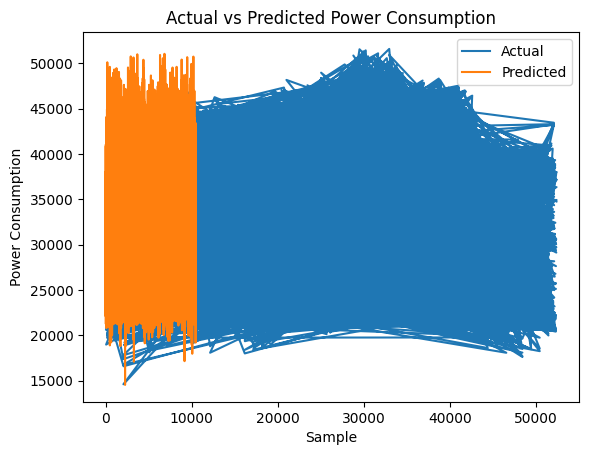

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Power Consumption')
plt.title('Actual vs Predicted Power Consumption')

# Add legend
plt.legend()

# Show the plot
plt.show()